# IME Members 

In this project, I helped the [Independent Electronic Music Union from Chile](https://imechile.org/) to consolidate a data set with their member's data and calculate some basic statistics. They had the information spread across three different spreadsheets, so I merged these datasets by their members' shared ID (emails). 

In the second step, I performed a quick statistical analysis of their members' composition, disaggregated by the three variables with fewer missing values. This analysis can orientate further actions such as campaigns' geographic scope to attract new members and balance gender gaps.


In [1]:
import pandas as pd

members_2020_dir = "/home/sebastian/Desktop/IME/members_data_bases/Socixs_IME_diciembre2020-MAX.xlsx"
new_members_dir = "/home/sebastian/Desktop/IME/members_data_bases/Socixs_nuevxs_ingreso2020.xlsx"
survey_2020_dir = "/home/sebastian/Desktop/IME/members_data_bases/Encuesta_socixs_junio2020.xlsx"

members_2020 = pd.read_excel(members_2020_dir, index_col =0) ## all members after dec 2020
new_members = pd.read_excel(new_members_dir, index_col = 1) ## new members enterig 2020
survey_2020  = pd.read_excel(new_members_dir, index_col = 1) ## survey to old members (pre 2020)

In [2]:
import janitor

members_2020 = members_2020.limit_column_characters(22).clean_names(remove_special = True, case_type = "lower", strip_accents = True, 
                                                    preserve_original_columns = False)


survey_2020=survey_2020.limit_column_characters(22).clean_names(remove_special = True, case_type = "lower", strip_accents = True, 
                                                    preserve_original_columns = False)

new_members=survey_2020.limit_column_characters(22).clean_names(remove_special = True, case_type = "lower", strip_accents = True, 
                                                    preserve_original_columns = False)

In [3]:
print(members_2020.columns)
print(members_2020.shape)

print(survey_2020.columns)
print(survey_2020.shape)

print(new_members.columns)
print(new_members.shape)

Index(['nombre', 'sexo', 'ci', 'telefono', 'mail', 'domicilio', 'ciudad',
       'proyecto_s_', 'sello_colectivo_otro', 'redes', 'ano_ingreso'],
      dtype='object')
(133, 11)
Index(['email_address', 'rut', 'genero', 'fecha_de_nacimiento', 'domicilio',
       'ciudad', 'pais', 'numero_de_celular', 'describe_tus_motivacio',
       'quienes_son_tus_spons', 'categoria_principal_de',
       'ocupaciones_categoria_', 'ocupaciones_categoria__1',
       'proyecto_principal_al', 'proyectos_secundarios_', 'sello_colectivo_ot',
       'links_principales_ej_', 'generos_principales_p', 'formato_de_show_'],
      dtype='object')
(51, 19)
Index(['email_address', 'rut', 'genero', 'fecha_de_nacimiento', 'domicilio',
       'ciudad', 'pais', 'numero_de_celular', 'describe_tus_motivacio',
       'quienes_son_tus_spons', 'categoria_principal_de',
       'ocupaciones_categoria_', 'ocupaciones_categoria_1',
       'proyecto_principal_al', 'proyectos_secundarios_', 'sello_colectivo_ot',
       'links_princ

In [4]:
survey_2020 = survey_2020.rename(columns={"email_address": "mail"})

new_members = new_members.rename(columns={"email_address": "mail"})


# joining the 3 datasets by 'email'

Email is the ID variable shared by the three databases. 

In [5]:
members_2020["mail"]=members_2020["mail"].str.strip().str.lower()
new_members["mail"]=new_members["mail"].str.strip().str.lower()
survey_2020["mail"]=survey_2020["mail"].str.strip().str.lower()

In [6]:
merge1 = members_2020.merge(new_members, how = 'left', left_on='mail', right_on='mail', suffixes=('', '_y'))

print(merge1.columns)



Index(['nombre', 'sexo', 'ci', 'telefono', 'mail', 'domicilio', 'ciudad',
       'proyecto_s_', 'sello_colectivo_otro', 'redes', 'ano_ingreso', 'rut',
       'genero', 'fecha_de_nacimiento', 'domicilio_y', 'ciudad_y', 'pais',
       'numero_de_celular', 'describe_tus_motivacio', 'quienes_son_tus_spons',
       'categoria_principal_de', 'ocupaciones_categoria_',
       'ocupaciones_categoria_1', 'proyecto_principal_al',
       'proyectos_secundarios_', 'sello_colectivo_ot', 'links_principales_ej_',
       'generos_principales_p', 'formato_de_show_'],
      dtype='object')


In [7]:
merge2 = merge1.merge(survey_2020, how = 'left', left_on='mail', right_on='mail')

merge2.drop(merge2.filter(regex='_y').columns.tolist(),axis=1, inplace=True)

#pd.DataFrame(merge2.columns)

#merge2 = merge2.set_index("proyecto(s)")

print(merge2.columns)
print(merge2.shape)

Index(['nombre', 'sexo', 'ci', 'telefono', 'mail', 'domicilio_x', 'ciudad_x',
       'proyecto_s_', 'sello_colectivo_otro', 'redes', 'ano_ingreso', 'rut_x',
       'genero_x', 'fecha_de_nacimiento_x', 'pais_x', 'numero_de_celular_x',
       'describe_tus_motivacio_x', 'quienes_son_tus_spons_x',
       'categoria_principal_de_x', 'ocupaciones_categoria__x',
       'ocupaciones_categoria_1', 'proyecto_principal_al_x',
       'proyectos_secundarios__x', 'sello_colectivo_ot_x',
       'links_principales_ej__x', 'generos_principales_p_x',
       'formato_de_show__x', 'ocupaciones_categoria__1'],
      dtype='object')
(139, 28)


In [8]:
merge2.columns=merge2.columns.str.replace('_x', '') 
merge2.columns=merge2.columns.str.replace('_1', '') 
merge2=merge2.drop_duplicates(subset=['ci']).remove_columns("rut")

In [9]:
print(merge2.columns)

Index(['nombre', 'sexo', 'ci', 'telefono', 'mail', 'domicilio', 'ciudad',
       'proyecto_s_', 'sello_colectivo_otro', 'redes', 'ano_ingreso', 'genero',
       'fecha_de_nacimiento', 'pais', 'numero_de_celular',
       'describe_tus_motivacio', 'quienes_son_tus_spons',
       'categoria_principal_de', 'ocupaciones_categoria_',
       'ocupaciones_categoria', 'proyecto_principal_al',
       'proyectos_secundarios_', 'sello_colectivo_ot', 'links_principales_ej_',
       'generos_principales_p', 'formato_de_show_', 'ocupaciones_categoria_'],
      dtype='object')


### Final dataset 

In [10]:
merge2.to_excel('base_ime_final.xlsx', index = False)

## Missing values 

First, lets visualize the n/a. The bars represent the number of missing values on each category. The most incomplete category is "REDES" (networks), that contains the information of social networks of each member. 

<AxesSubplot:>

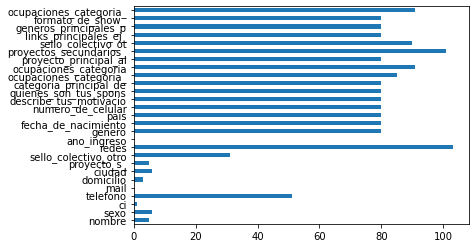

In [11]:
merge2.isna().sum().plot(kind='barh')

# Graphics and summary statistics 

## grouped by city, gender and year of sign up

In [12]:
import matplotlib.pyplot as plt

In [13]:
merge2["ciudad"] = merge2["ciudad"].str.strip().str.lower().replace('santiago centro', 'santiago').replace('stgo', 'santiago')

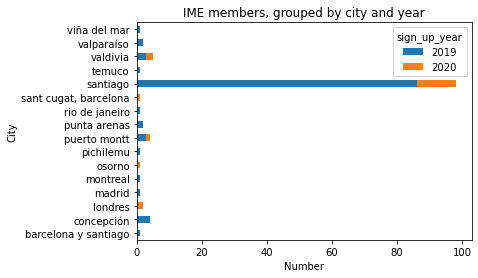

In [15]:
merge2 = merge2.rename(columns={"ano_ingreso": "sign_up_year"})
merge2 = merge2.rename(columns={"ciudad": "city"})
merge2 = merge2.rename(columns={"sexo": "gender"})



merge2.groupby(['city','sign_up_year']).size().unstack().plot(kind='barh',stacked=True)
plt.title("IME members, grouped by city and year")
plt.xlabel("Number")
plt.ylabel("City")
plt.show()

In [16]:
import sidetable

In [17]:
merge2[merge2["sign_up_year"]==2019].stb.freq(['sign_up_year', 'city'], style=True)

,sign_up_year,city,count,percent,cumulative_count,cumulative_percent
0,2019,santiago,86,80.37%,86,80.37%
1,2019,concepción,4,3.74%,90,84.11%
2,2019,valdivia,3,2.80%,93,86.92%
3,2019,puerto montt,3,2.80%,96,89.72%
4,2019,valparaíso,2,1.87%,98,91.59%
5,2019,punta arenas,2,1.87%,100,93.46%
6,2019,viña del mar,1,0.93%,101,94.39%
7,2019,temuco,1,0.93%,102,95.33%
8,2019,rio de janeiro,1,0.93%,103,96.26%
9,2019,pichilemu,1,0.93%,104,97.20%


In [18]:
merge2[merge2["sign_up_year"]==2020].stb.freq(['sign_up_year', 'city'], style=True)

,sign_up_year,city,count,percent,cumulative_count,cumulative_percent
0,2020,santiago,12,63.16%,12,63.16%
1,2020,valdivia,2,10.53%,14,73.68%
2,2020,londres,2,10.53%,16,84.21%
3,2020,"sant cugat, barcelona",1,5.26%,17,89.47%
4,2020,puerto montt,1,5.26%,18,94.74%
5,2020,osorno,1,5.26%,19,100.00%


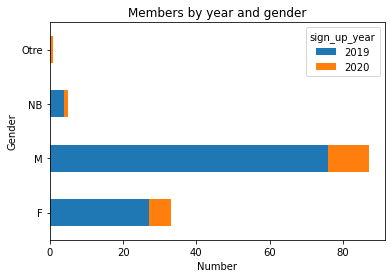

In [20]:
merge2.groupby(['gender','sign_up_year']).size().unstack().plot(kind='barh',stacked=True)
plt.title("Members by year and gender")
plt.xlabel("Number")
plt.ylabel("Gender")
plt.show()

In [21]:
merge2[merge2["sign_up_year"]==2019].stb.freq(['sign_up_year', 'gender'],  style=True)

,sign_up_year,gender,count,percent,cumulative_count,cumulative_percent
0,2019,M,76,71.03%,76,71.03%
1,2019,F,27,25.23%,103,96.26%
2,2019,NB,4,3.74%,107,100.00%


In [22]:
merge2[merge2["sign_up_year"]==2020].stb.freq(['sign_up_year', 'gender'],  style=True)

,sign_up_year,gender,count,percent,cumulative_count,cumulative_percent
0,2020,M,11,57.89%,11,57.89%
1,2020,F,6,31.58%,17,89.47%
2,2020,Otre,1,5.26%,18,94.74%
3,2020,NB,1,5.26%,19,100.00%
